In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/BernardEtAl.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       2241 non-null   object 
 1   Mutation Count                   2241 non-null   float64
 2   BM Blast (%)                     2241 non-null   float64
 3   Hemoglobin (g/dL)                2241 non-null   float64
 4   Overall Survival (Months)        2241 non-null   float64
 5   Overall Survival Status          2241 non-null   object 
 6   Platelet (G/L)                   2241 non-null   float64
 7   Sex                              2241 non-null   object 
 8   WHO 2016 Classification          2241 non-null   object 
 9   Absolute Neutrophil Count (G/L)  2241 non-null   float64
 10  Monocyte Count (G/L)             2241 non-null   float64
 11  PB Blast (%)                     2241 non-null   float64
 12  TMB (nonsynonymous) 

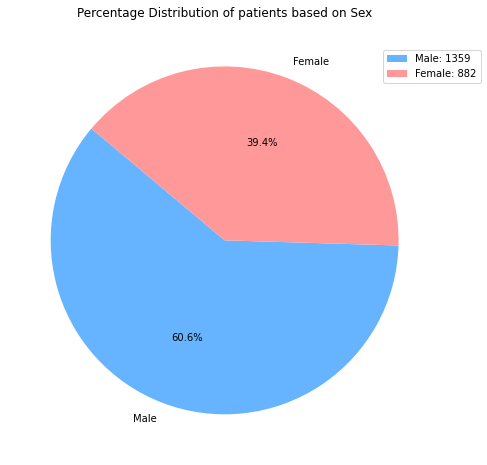

In [34]:
# Count the occurrences of each unique value in the column
value_counts = df["Sex"].value_counts()

# Data to plot
sizes = value_counts.values
labels = value_counts.index

# Plot
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])

plt.legend(wedges, [f"{label}: {size}" for label, size in zip(labels, sizes)], loc="upper right", bbox_to_anchor=(1.1, 0.95))

plt.title("Percentage Distribution of patients based on Sex")

# Save the plot to a PDF file
plt.savefig("../results/plots/sex_distribution.pdf", format='pdf', bbox_inches='tight')

plt.show()

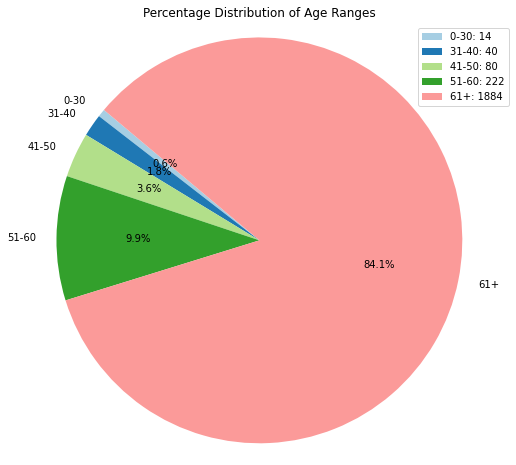

In [26]:
# Define age ranges
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']

# Create a new column for age ranges
df['age_range'] = pd.cut(df["Age in years"], bins=bins, labels=labels, right=False)

# Count the occurrences of each age range
age_range_counts = df['age_range'].value_counts().sort_index()

# Data to plot
sizes = age_range_counts.values
age_labels = age_range_counts.index

# Plot
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=age_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(age_labels))))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend with values on the top right
plt.legend(wedges, [f"{label}: {size}" for label, size in zip(age_labels, sizes)], loc="upper right", bbox_to_anchor=(1.07, 1))

plt.title('Percentage Distribution of Age Ranges')

# Save the plot to a PDF file
plt.savefig("../results/plots/agerange_distribution.pdf", format='pdf', bbox_inches='tight')

plt.show()

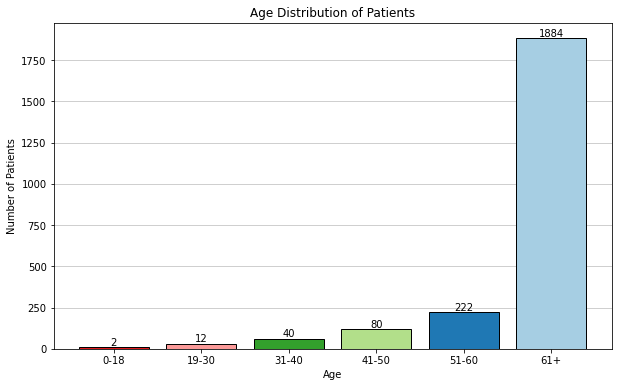

In [33]:
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']

# Create a new column for age ranges
df['age_range'] = pd.cut(df["Age in years"], bins=bins, labels=labels, right=False)

# Count the occurrences of each age range
age_range_counts = df['age_range'].value_counts().sort_index()

# Data to plot
sizes_labels = age_range_counts.values
sizes = [9, 30, 60, 120, 222, 1884]
age_labels = age_range_counts.index

# Plot histogram
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(axis='y', alpha=0.75, zorder=0)
bars = ax.bar(age_labels, sizes, color=list(reversed(plt.cm.Paired(range(len(age_labels))))), edgecolor='black', zorder=3)

# Formatting
ax.set_xlabel('Age')
ax.set_ylabel('Number of Patients')
ax.set_title('Age Distribution of Patients')

# Adding labels on top of bars
for bar, value in zip(bars, sizes_labels):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value}', ha='center', va='bottom')

# Save plot to a PDF file
plt.savefig('../results/plots/age_distribution.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [9]:
age_labels

CategoricalIndex(['0-18', '19-30', '31-40', '41-50', '51-60', '61+'], categories=['0-18', '19-30', '31-40', '41-50', '51-60', '61+'], ordered=True, dtype='category')